[Reference](https://python.plainenglish.io/run-sql-queries-on-your-pandas-data-frames-in-5-minutes-80db524cf358)

In [1]:
pip install duckdb==0.3.2

     |████████████████████████████████| 12.5 MB 4.4 MB/s 


# Loading our Data

In [3]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
films = pd.read_html(url)[0]
print(films.head())

   Rank Peak                         Title Worldwide gross  Year Reference(s)
0     1    1                        Avatar  $2,847,246,203  2009   [# 1][# 2]
1     2    1             Avengers: Endgame  $2,797,501,328  2019   [# 3][# 4]
2     3    1                       Titanic  $2,187,425,379  1997   [# 5][# 6]
3     4    3  Star Wars: The Force Awakens  $2,068,223,624  2015   [# 7][# 8]
4     5    4        Avengers: Infinity War  $2,048,359,754  2018  [# 9][# 10]


# Reading our Data in DuckDB

In [4]:
import duckdb

con = duckdb.connect(database=':memory:')
con.execute("SELECT * FROM films").df()

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avatar,"$2,847,246,203",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,1,Titanic,"$2,187,425,379",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]
5,6,6,Spider-Man: No Way Home,"$1,892,095,052",2021,[# 11]
6,7,3,Jurassic World,"$1,671,537,444",2015,[# 12][# 13]
7,8,7,The Lion King,"$1,656,943,394",2019,[# 14][# 4]
8,9,3,The Avengers,"$1,518,812,988",2012,[# 15][# 16]
9,10,4,Furious 7,"$1,516,045,911",2015,[# 17][# 18]


# Cleaning our Data in SQL

In [5]:
films_clean = con.execute("""
            SELECT 
                Rank
                , Peak
                , Title
                , Year
                , cast(replace("Worldwide gross"[instr("Worldwide gross",'$'):],',','') as bigint) as WorldwideGross
            FROM films
            """).df()
print(films_clean.dtypes)

Rank               int64
Peak              object
Title             object
Year               int64
WorldwideGross     int64
dtype: object


# Charting the average for each year

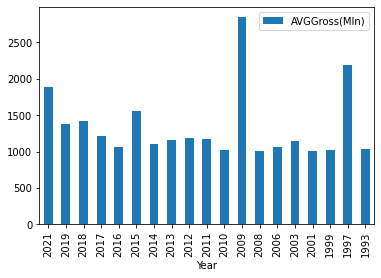

In [6]:
avg_year = con.execute("""
                        SELECT 
                            Year
                            , AVG(WorldwideGross) / 1000000 as "AVGGross(Mln)" 
                        FROM films_clean GROUP BY Year ORDER BY 1 DESC
                    """).df()
avg_year.plot(x='Year', y='AVGGross(Mln)', kind='bar')